# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

n     Energy            log10(ΔE)   log10(Δρ)   Δtime
---   ---------------   ---------   ---------   ------
  1   +64.36949742807                   -2.49    6.13s
  2   +58.27460242935        0.78       -1.39   72.7ms
  3   +42.75547208388        1.19       -1.01   14.3ms
  4   +32.72182473424        1.00       -0.87   40.0ms
  5   +28.65270254117        0.61       -0.76   12.3ms
  6   +13.62042284706        1.18       -0.71   16.1ms
  7   +12.88111147864       -0.13       -0.91   8.53ms
  8   +10.92717077925        0.29       -0.63   14.1ms
  9   +9.334307576085        0.20       -0.67   13.8ms
 10   +7.680212136437        0.22       -0.73   13.8ms
 11   +6.919436428620       -0.12       -0.66   8.65ms
 12   +6.389827978826       -0.28       -0.68   12.0ms
 13   +6.207808846761       -0.74       -0.76   11.9ms
 14   +6.090523098309       -0.93       -0.77   8.83ms
 15   +5.954415594367       -0.87       -0.83   12.0ms
 16   +5.944013546273       -1.98       -0.88   6.68ms
 17   +5.89

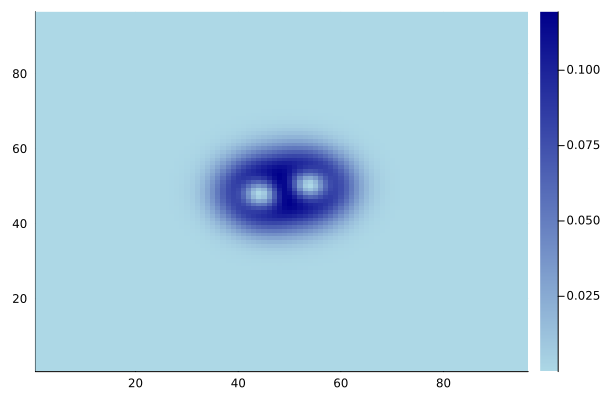

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)